# Players dataframes with t-1 variables

En este script nos dedicaremos a crear una base de datos limpia segmentada por hitters y pitchers. Debido a que es totalmente análogo al script para variables del mismo periodo $t$, se omitirán solo las explicaciones del código reutilizado.

- **Visualización del contenido de las bases de datos.**
- **Limpieza de la base de datos y exportación.**
- **Creación de indicador de si el jugador es agente libre.**

In [1]:
import pandas as pd
import numpy as np
import math
import os
import warnings
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly
from termcolor import colored
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('C:/Users/metal/Documents/Github/MLB_hardball_negotations/')

Directorio de trabajo previo: C:\Users\metal\Documents\Github\MLB_hardball_negotations\Visualizations\Descriptive_statistics\Panel


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = "C:/Users/metal/Documents/Github/MLB_hardball_negotations"
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

C:\Users\metal\Documents\Github\MLB_hardball_negotations
Nuevo directorio de trabajo: None


## Visualización de las bases de datos

In [5]:
import_path = 'ETL_Data/Panel/General/Teams/teams_panel.csv'

In [6]:
general_panel = pd.read_csv(import_path)
print("Las dimensiones del panel son: " + str(general_panel.shape))
general_panel.head()

Las dimensiones del panel son: (349, 16)


,Acronimo,Equipo,Victorias,Juegos totales,Playoffs,Pennants won,WS ganadas,Anio,Rango,Valor_Corriente,1An_Cambio_Valor%,Valor%,Ingresos_equipo,Ingresos_Operando,Estado,Cantidad de equipos
0,ARI,Arizona Diamondbacks,94,162,5,1,1,2011,20,396.0,4.0,25.0,180,6.2,Arizona,1
1,ATL,Atlanta Braves,89,162,21,18,3,2011,13,482.0,7.0,0.0,201,22.2,Georgia,1
2,BAL,Baltimore Orioles,69,162,11,7,3,2011,18,411.0,9.0,37.0,175,25.5,Maryland,1
3,BOS,Boston Red Sox,90,162,20,12,7,2011,2,912.0,5.0,26.0,272,-1.1,Massachusetts,1
4,CHC,Chicago Cubs,71,162,16,17,2,2011,4,773.0,6.0,75.0,258,23.4,Illinois,2


In [14]:
column_names = ['Victorias', 'Playoffs', 'Pennants won', 'WS ganadas', 
                'Rango', 'Valor_Corriente', '1An_Cambio_Valor%', 'Valor%',
                'Ingresos_Operando']
ylabel_names = ['Victorias', 'Playoffs', 'Pennants ganados', 'Mundiales ganados', 
                'Rango', 'Valor Corriente [BDD]', 'Cambio de Valor Anual%', 'Valor%',
                'Ingresos Operando [MDD]']

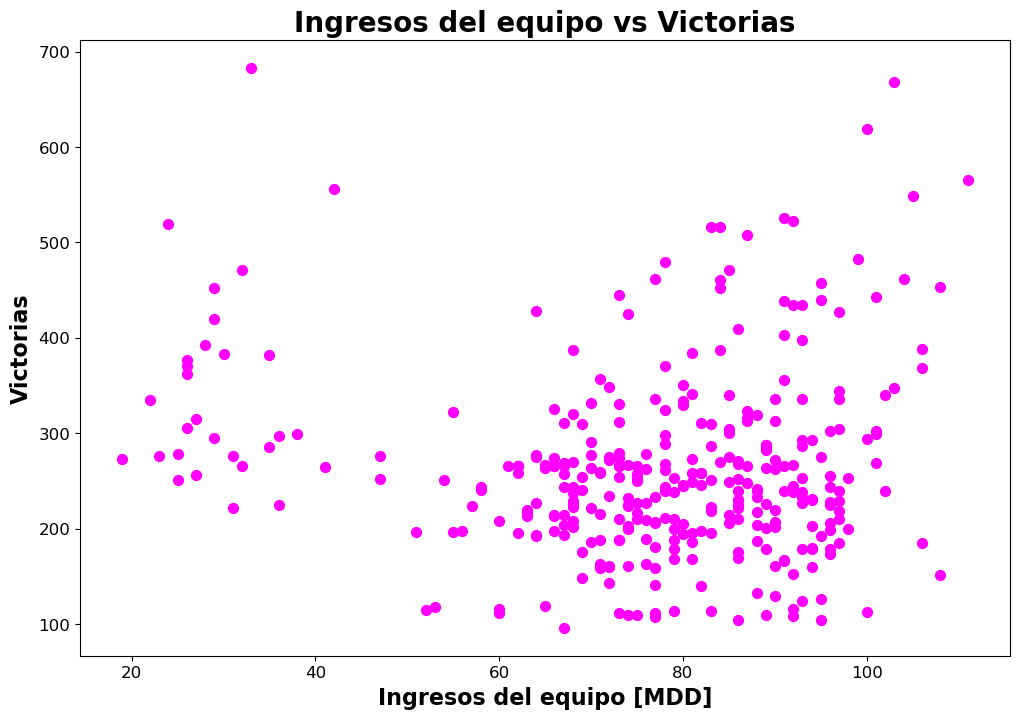

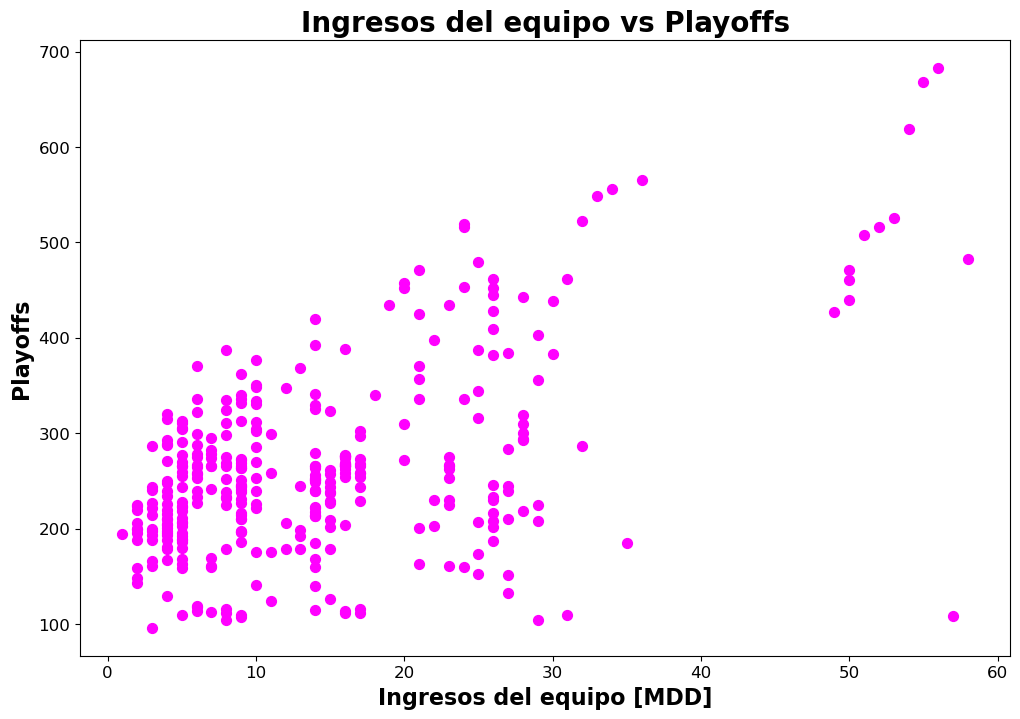

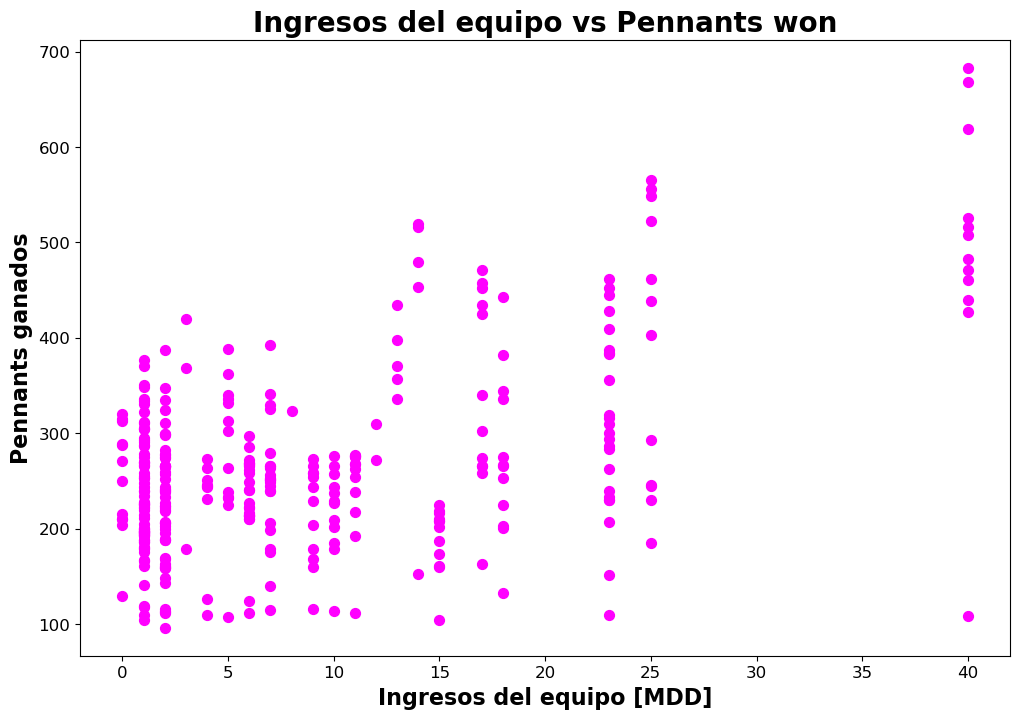

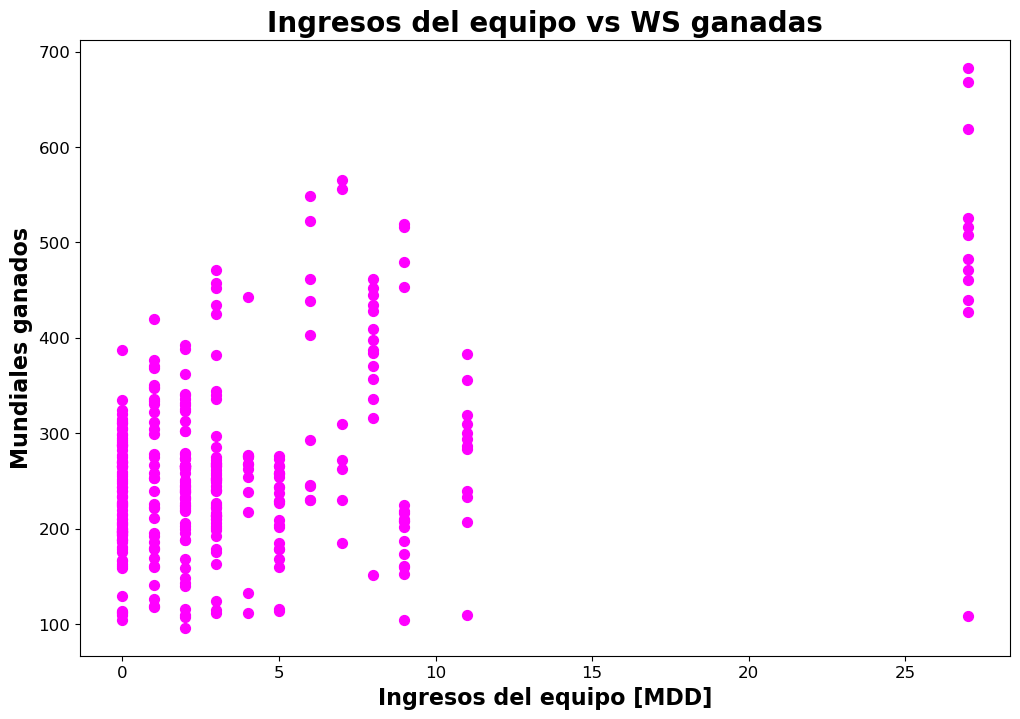

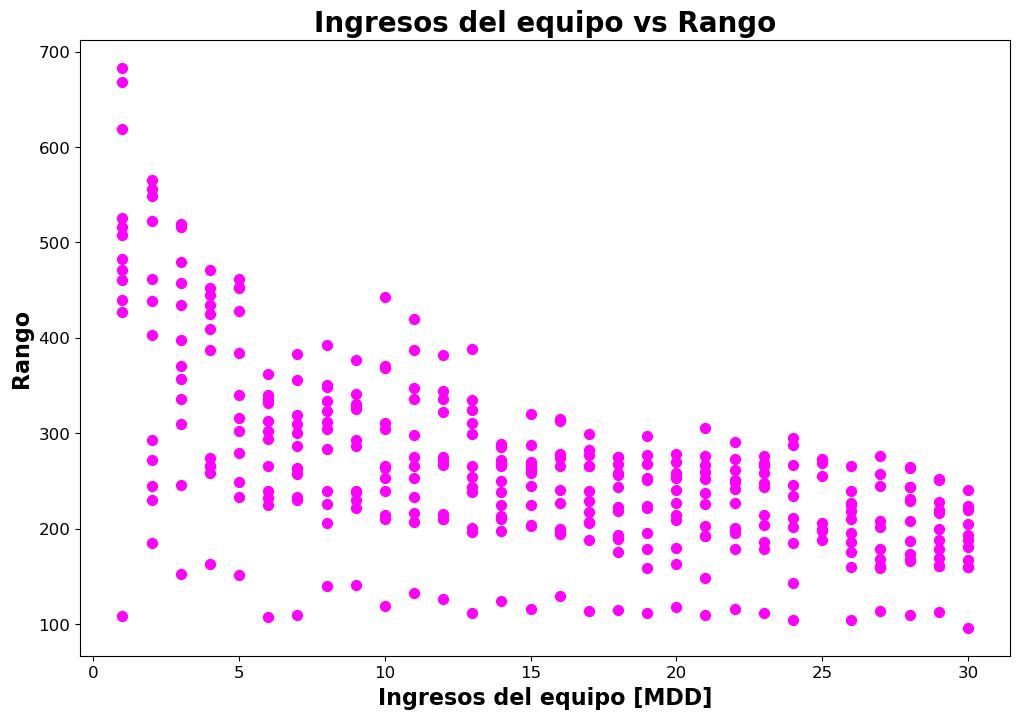

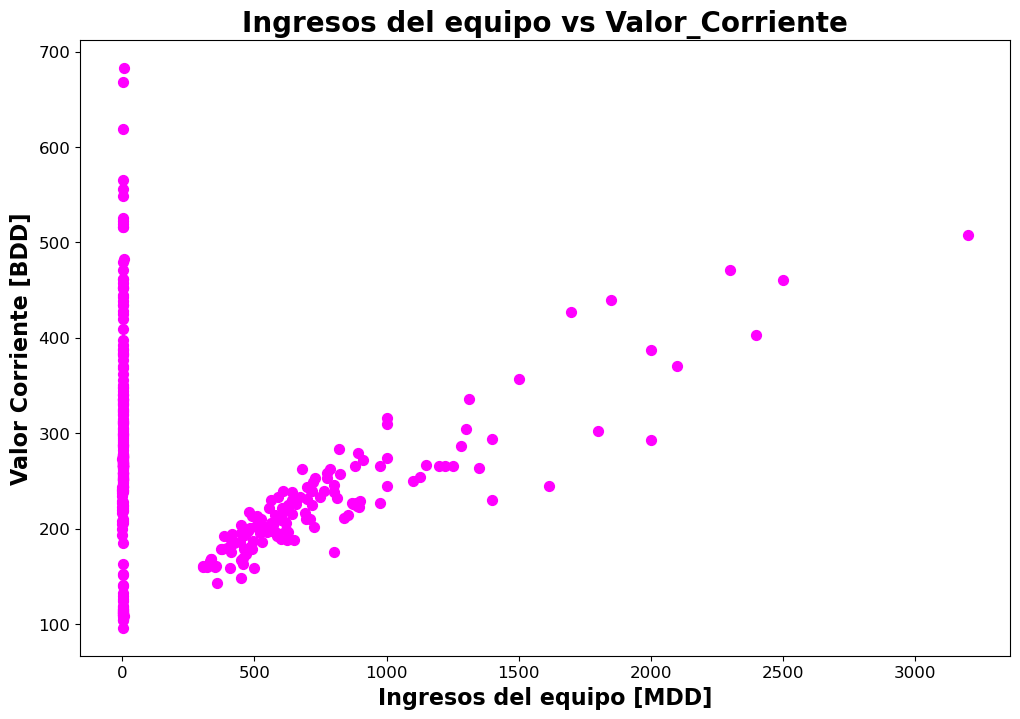

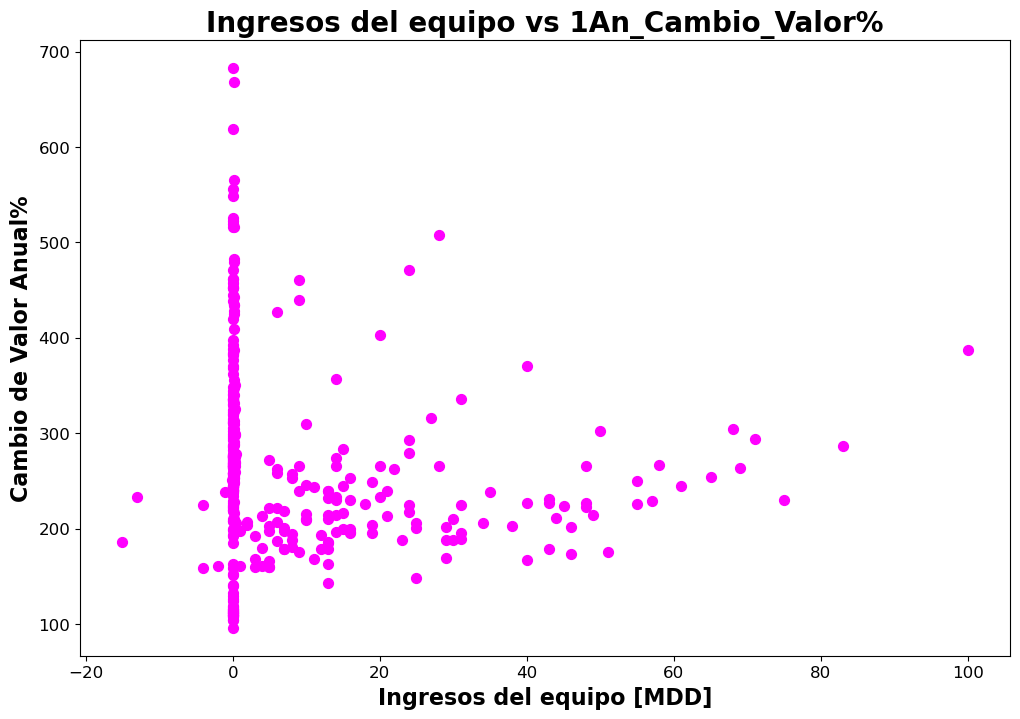

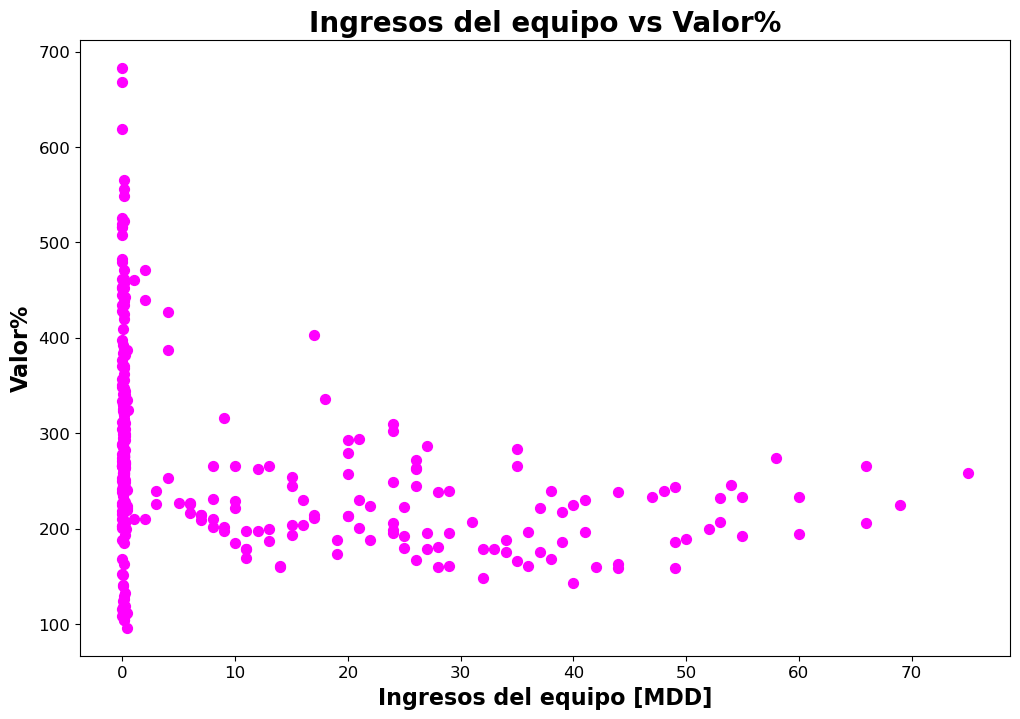

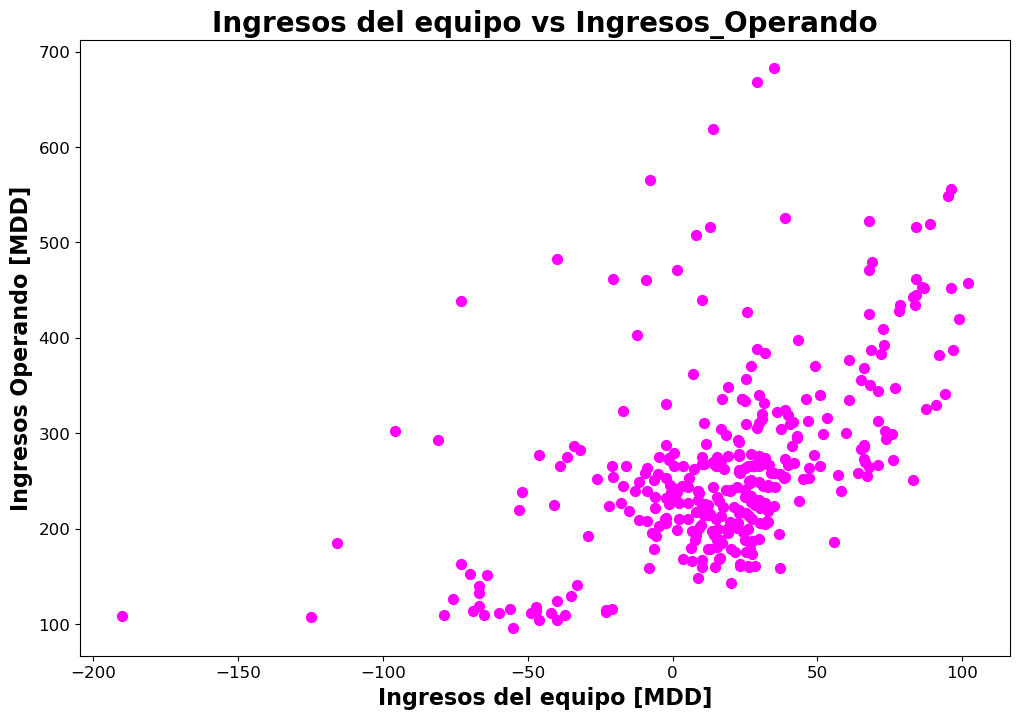

In [15]:
for index,name in zip(range(0,len(column_names)),column_names):
    plt.figure(figsize=(12, 8))
    plt.scatter(general_panel[name], general_panel['Ingresos_equipo'], color="magenta", s=50)
    plt.title("Ingresos del equipo vs " + str(name), fontsize=20, fontweight='bold', color='black')
    plt.xlabel('Ingresos del equipo [MDD]', fontsize=16, color='black', fontweight='bold')
    plt.ylabel(ylabel_names[index], fontsize=16, color='black', fontweight='bold')
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.grid(False)  # Desactivar la cuadrícula
    #
    plt.show()

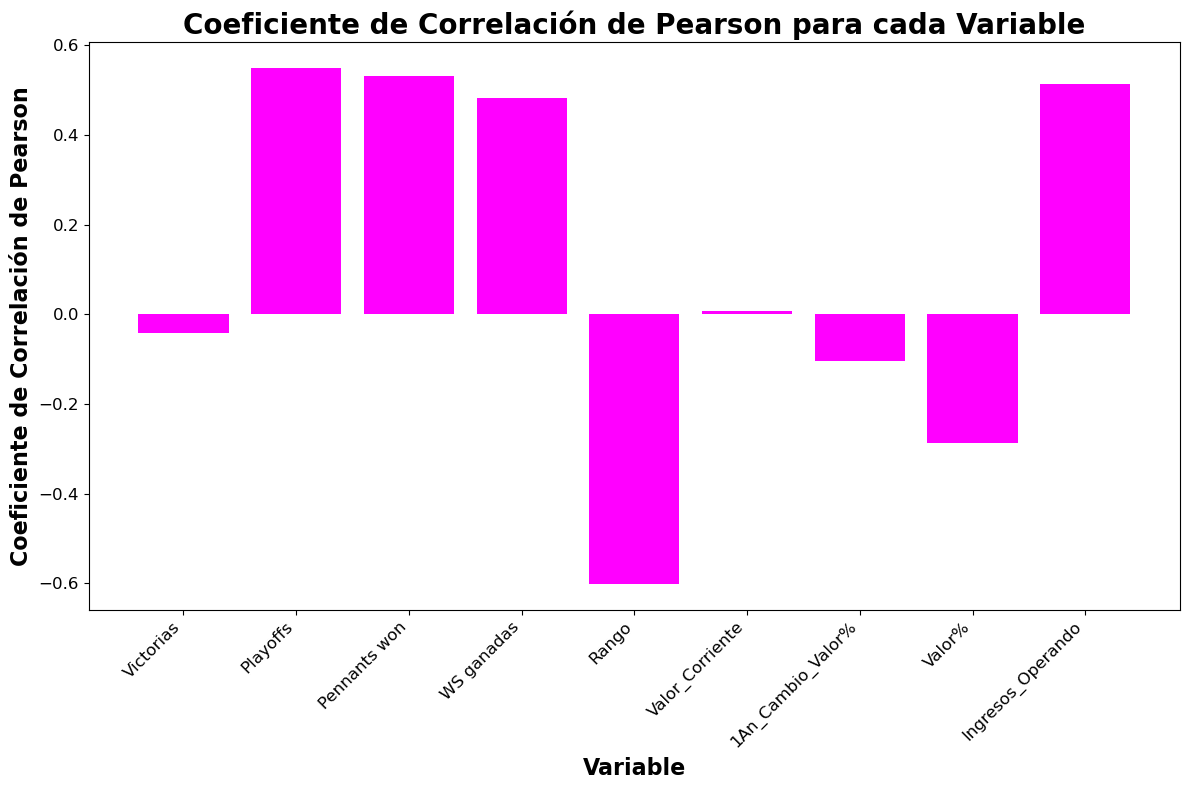

Coeficiente de Pearson para 'Victorias': -0.04113457980412861
Coeficiente de Pearson para 'Playoffs': 0.5498887227063637
Coeficiente de Pearson para 'Pennants won': 0.5301816803575697
Coeficiente de Pearson para 'WS ganadas': 0.48294362780664885
Coeficiente de Pearson para 'Rango': -0.6010038628099986
Coeficiente de Pearson para 'Valor_Corriente': 0.007757710989843206
Coeficiente de Pearson para '1An_Cambio_Valor%': -0.10514970548774483
Coeficiente de Pearson para 'Valor%': -0.2867705138185926
Coeficiente de Pearson para 'Ingresos_Operando': 0.512300070633294


In [10]:
import matplotlib.pyplot as plt

# Calcular el coeficiente de correlación de Pearson para cada variable con "Ingresos_equipo"
pearson_coeffs = {}
for name in column_names:
    pearson_coeffs[name] = general_panel[name].corr(general_panel['Ingresos_equipo'])

# Graficar los coeficientes en un histograma
plt.figure(figsize=(12, 8))
plt.bar(pearson_coeffs.keys(), pearson_coeffs.values(), color='magenta')
plt.title("Coeficiente de Correlación de Pearson para cada Variable", fontsize=20, fontweight='bold', color='black')
plt.xlabel('Variable', fontsize=16, color='black', fontweight='bold')
plt.ylabel('Coeficiente de Correlación de Pearson', fontsize=16, color='black', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(False)  # Desactivar la cuadrícula
plt.tight_layout()
plt.show()

# Imprimir los coeficientes y sus respectivas variables
for name, coeff in pearson_coeffs.items():
    print(f"Coeficiente de Pearson para '{name}': {coeff}")


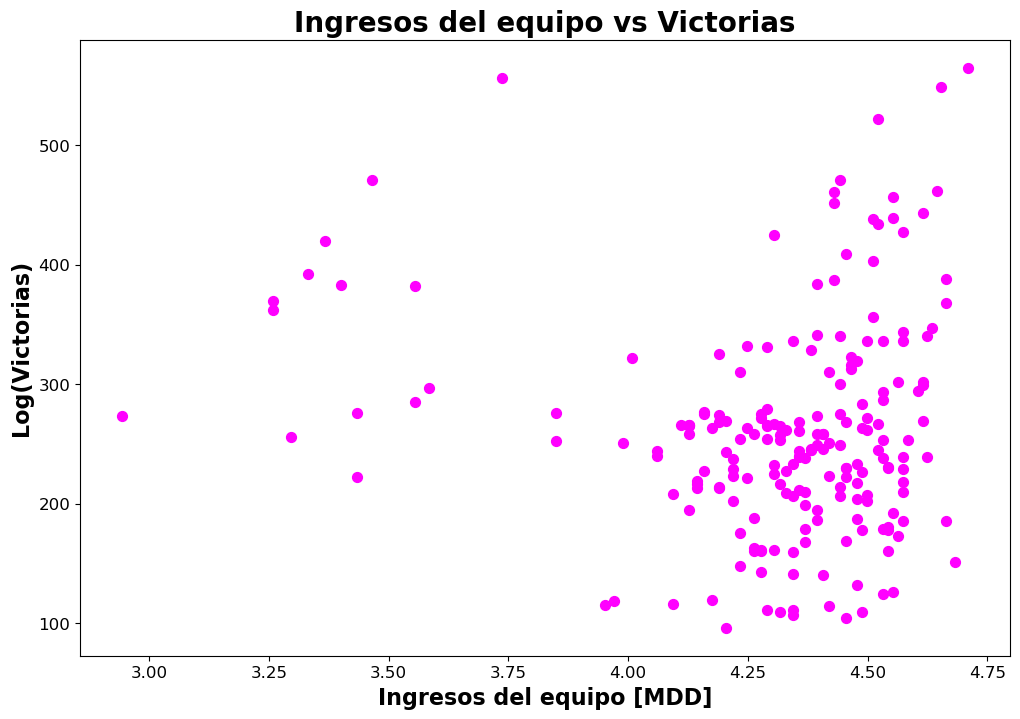

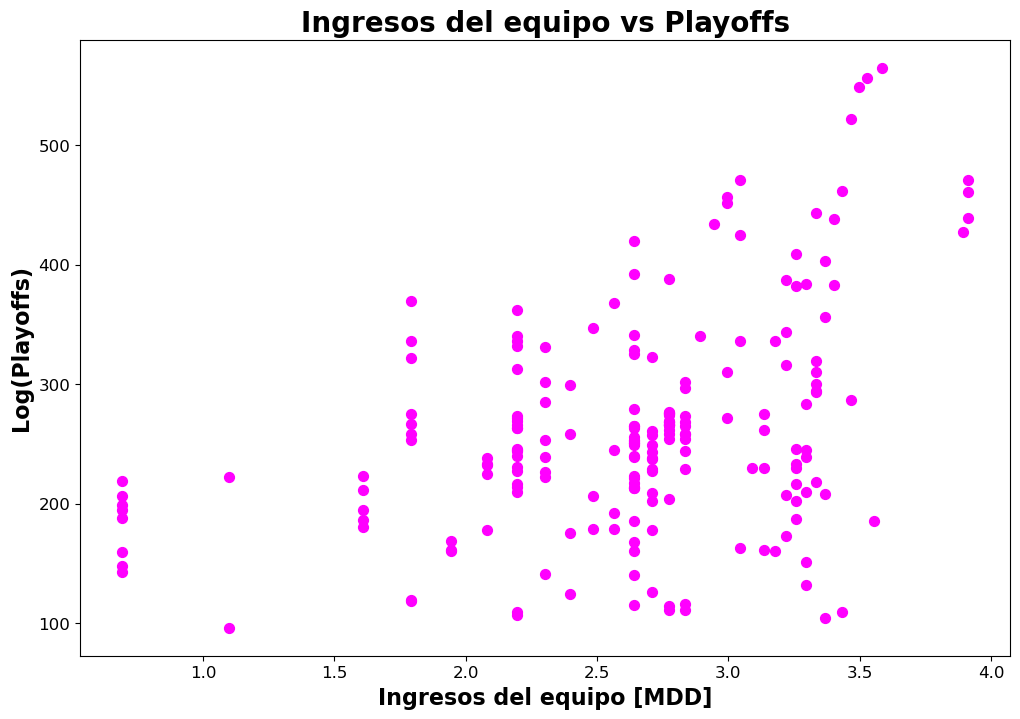

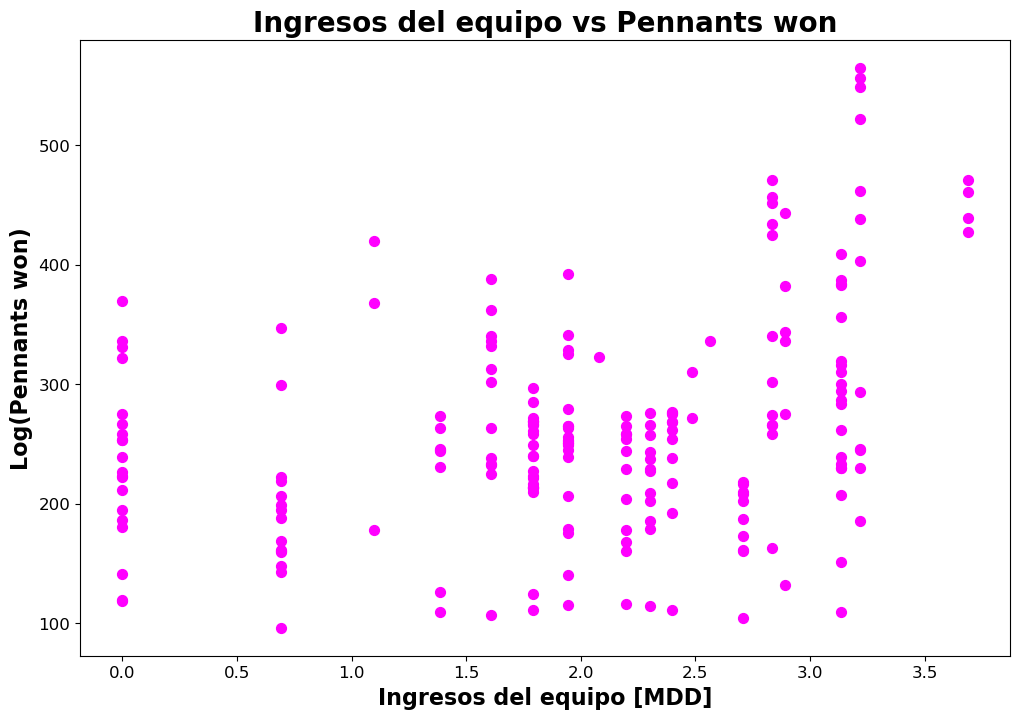

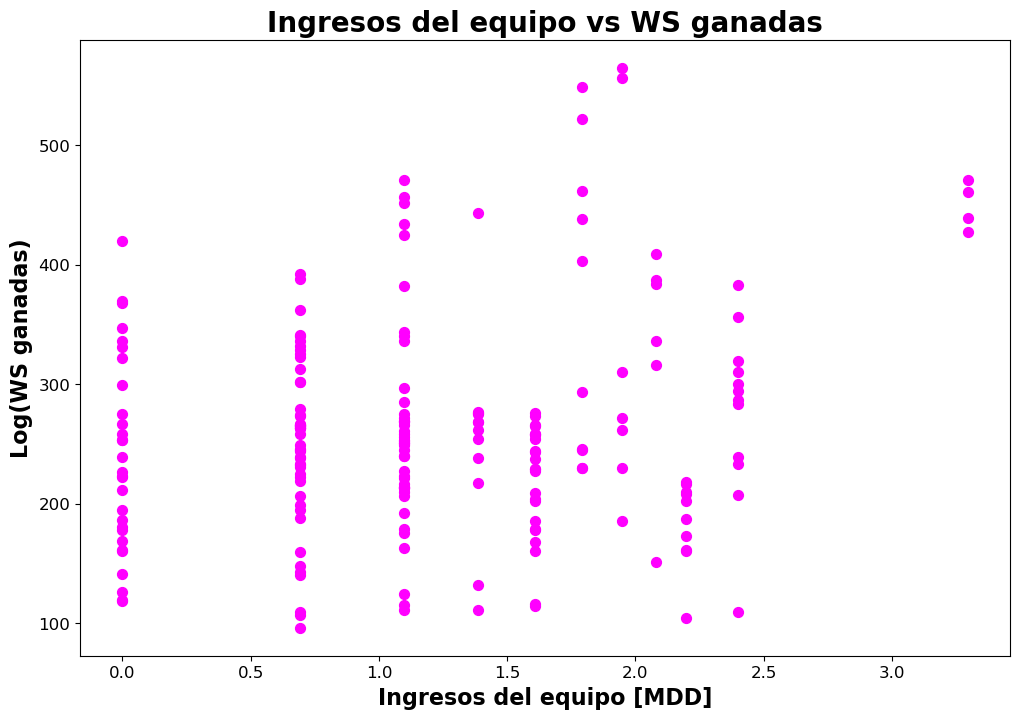

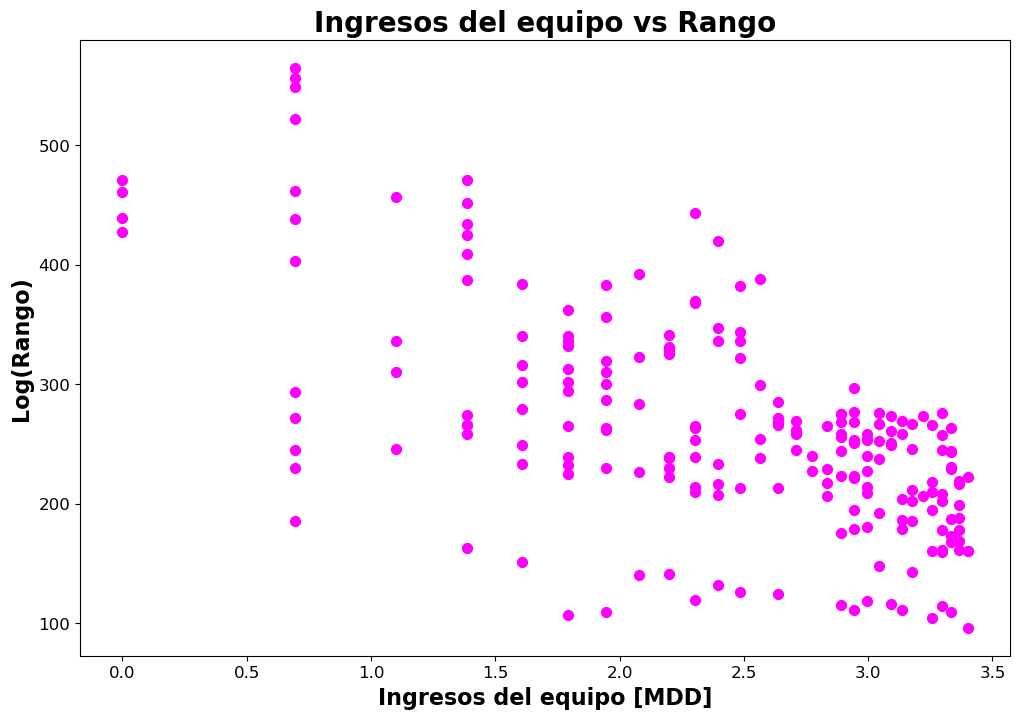

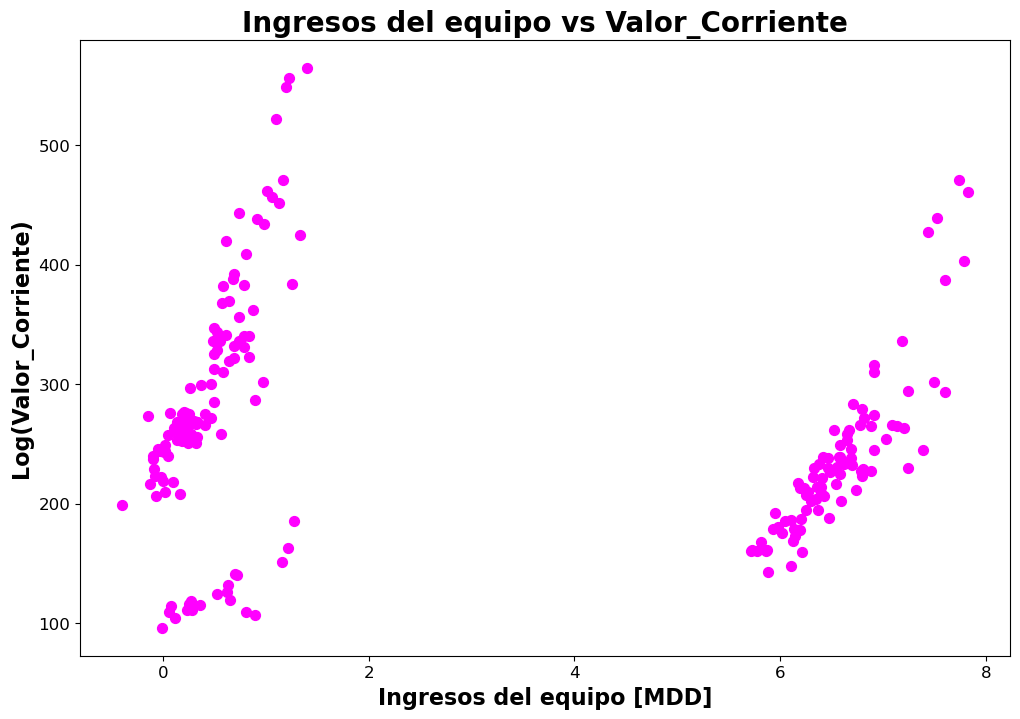

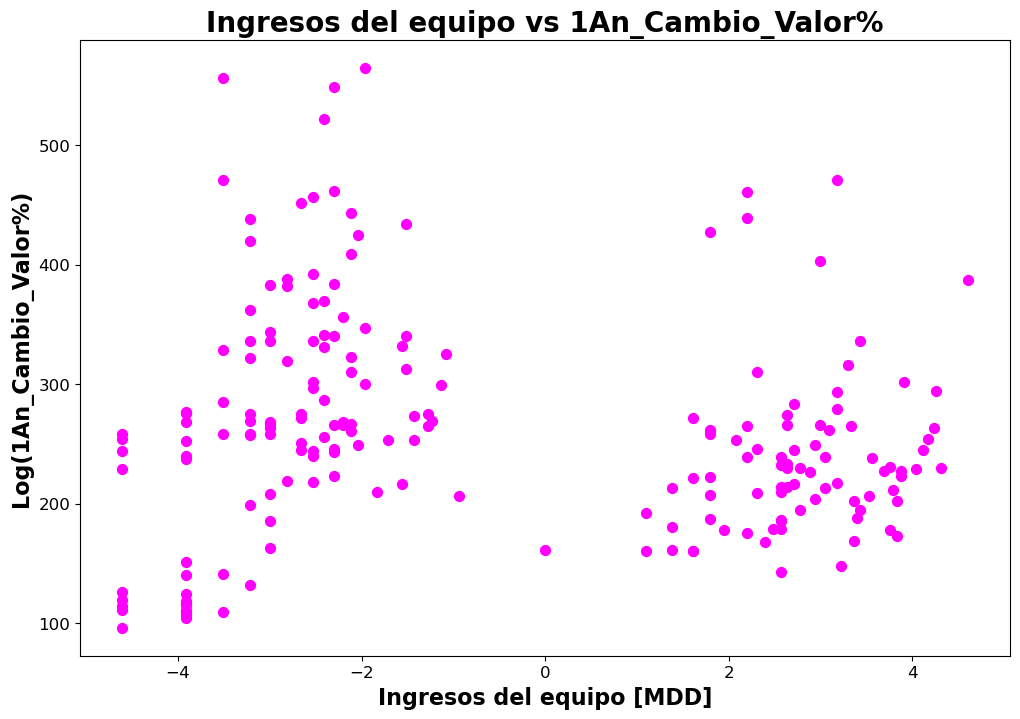

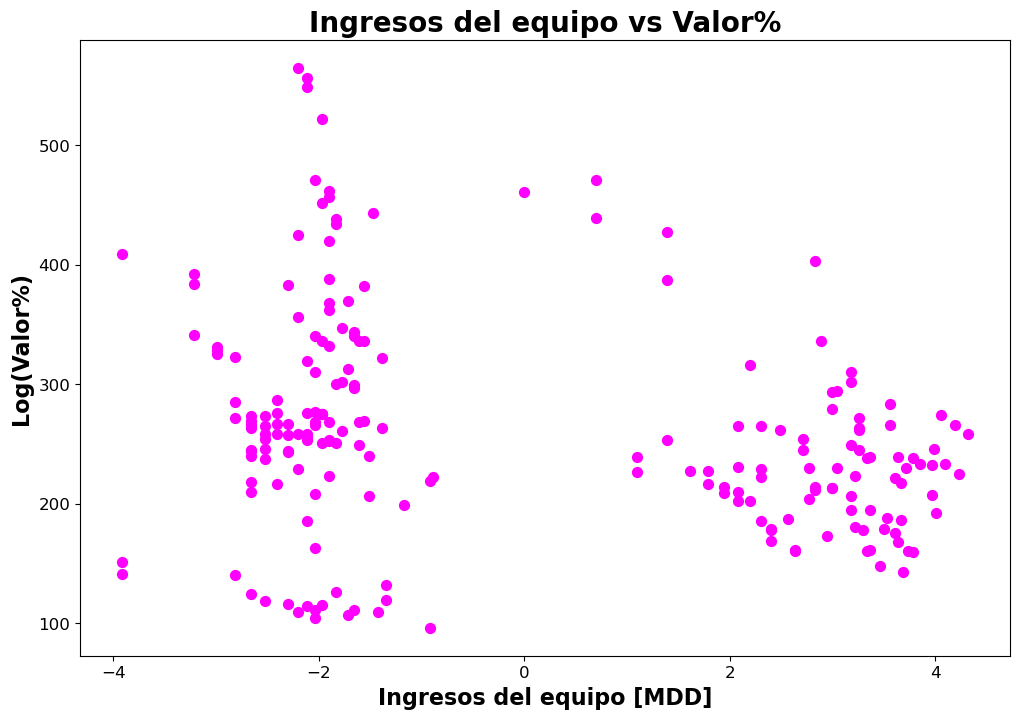

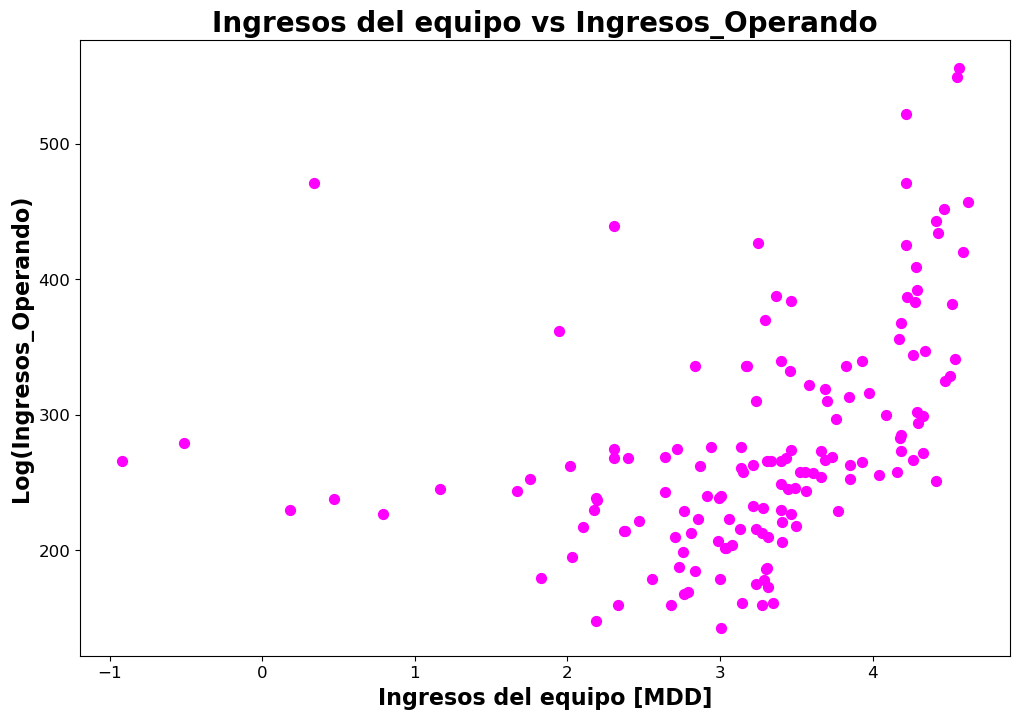

In [12]:
import numpy as np

# Crear una copia del DataFrame para evitar modificar el original
general_panel_log = general_panel.copy()

# Eliminar filas que contienen ceros numéricos en las variables que no son "Ingresos_equipo"
for name in column_names:
    if name != "Ingresos_equipo":
        general_panel_log = general_panel_log[general_panel_log[name] != 0]

# Aplicar np.log a las variables que no son "Ingresos_equipo"
for name in column_names:
    if name != "Ingresos_equipo":
        general_panel_log[name] = np.log(general_panel_log[name])

# Graficar las variables transformadas
for name in column_names:
    plt.figure(figsize=(12, 8))
    plt.scatter(general_panel_log[name], general_panel_log['Ingresos_equipo'], color="magenta", s=50)
    plt.title("Ingresos del equipo vs " + str(name), fontsize=20, fontweight='bold', color='black')
    plt.xlabel('Ingresos del equipo [MDD]', fontsize=16, color='black', fontweight='bold')
    plt.ylabel(f"Log({name})", fontsize=16, color='black', fontweight='bold')
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.grid(False)  # Desactivar la cuadrícula
    plt.show()